In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [7]:
os.chdir('/Users/luiscarrillo/OneDrive/Desktop/GitHub/DataScience/TimeSeries/Datasets/')
v_cordoba = pd.read_excel("Cordoba.xlsx")
v_cordoba.head()

,,V_Resident,V_Extranj
0,2005M01,27816,9332
1,2005M02,34920,11387
2,2005M03,45221,21663
3,2005M04,41027,29094
4,2005M05,50750,32076


In [3]:
v_cordoba.columns=['Date','V_Resident','V_Extranj']
v_cordoba['Date'] = pd.to_datetime(v_cordoba['Date'], format='%YM%m')
v_cordoba.index = v_cordoba['Date']
del v_cordoba['Date']
print(v_cordoba.head())

            V_Resident  V_Extranj
Date                             
2005-01-01       27816       9332
2005-02-01       34920      11387
2005-03-01       45221      21663
2005-04-01       41027      29094
2005-05-01       50750      32076


Text(0.5, 1.0, 'Viajeros alojados en hoteles en Córdoba')

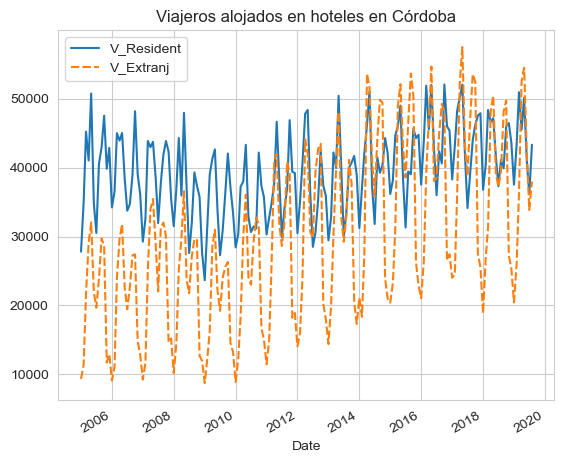

In [4]:
sns.lineplot(v_cordoba)
plt.xticks(rotation=30, ha='right')
plt.title('Viajeros alojados en hoteles en Córdoba')

In [5]:
result = seasonal_decompose(v_cordoba['V_Extranj'], model='multiplicative')

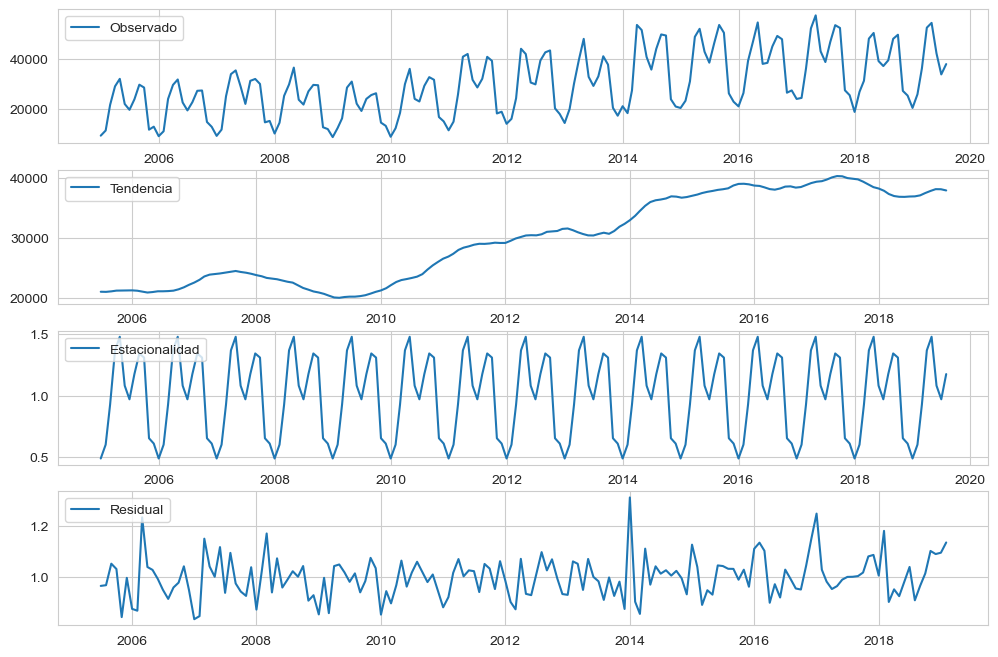

In [6]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observado')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad')  # Corrected here
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.show()

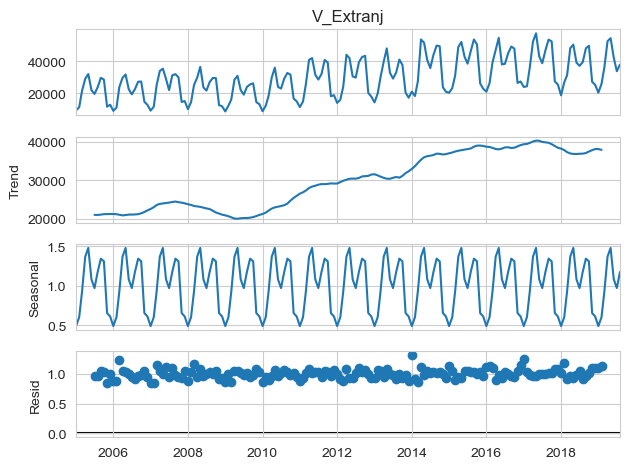

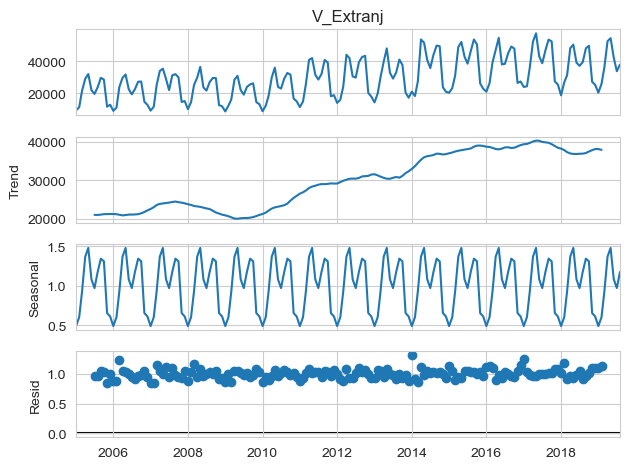

In [7]:
result.plot()

In [8]:
print(result.seasonal)

Date
2005-01-01    0.489635
2005-02-01    0.601963
2005-03-01    0.927655
2005-04-01    1.366617
2005-05-01    1.476760
                ...   
2019-04-01    1.366617
2019-05-01    1.476760
2019-06-01    1.080087
2019-07-01    0.969568
2019-08-01    1.174033
Name: seasonal, Length: 176, dtype: float64


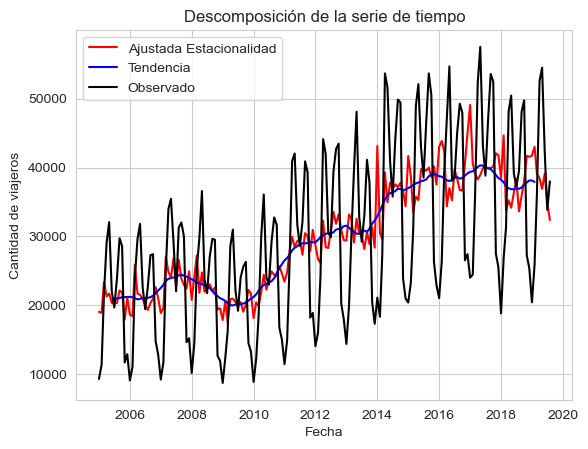

In [9]:
plt.plot(result.observed/result.seasonal, label='Ajustada Estacionalidad', color='red')
plt.plot(result.trend, label='Tendencia', color='blue')
plt.plot(result.observed, label='Observado', color='black')
plt.legend()
plt.title("Descomposición de la serie de tiempo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de viajeros")
plt.show()

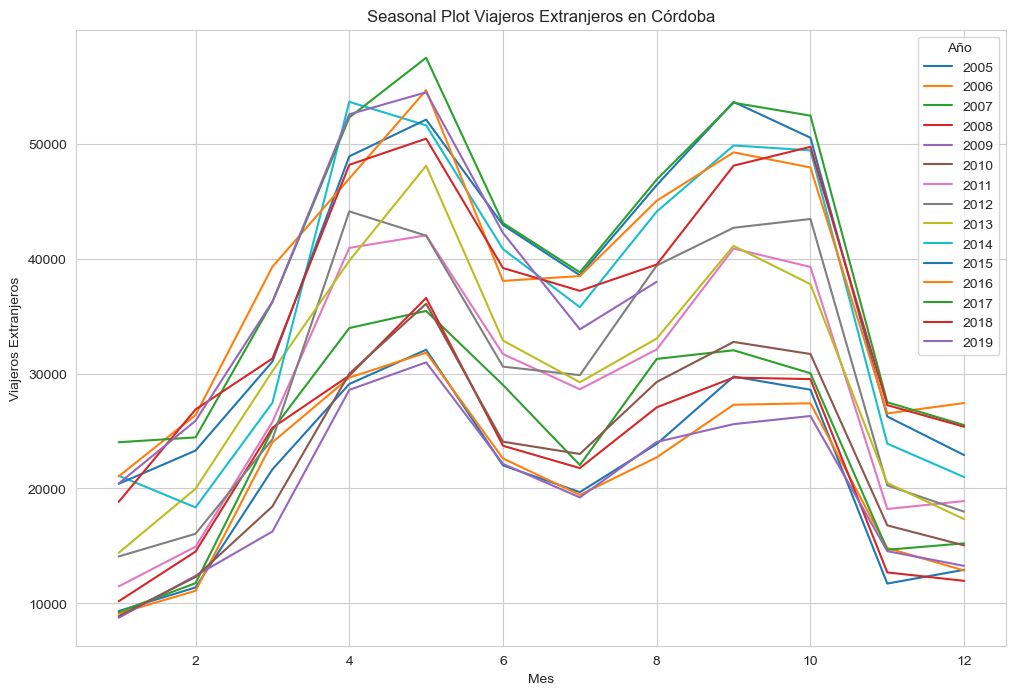

In [10]:
v_cordoba['Año'] = pd.to_datetime(v_cordoba.index, format='%YM%m').year
plt.figure(figsize=(12, 8))
for Año, datos_año in v_cordoba.groupby('Año'):
    plt.plot(datos_año.index.month, datos_año['V_Extranj'], label=str(Año))
# Añadir leyendas y título
plt.legend(title='Año')
plt.title('Seasonal Plot Viajeros Extranjeros en Córdoba')
plt.xlabel('Mes')
plt.ylabel('Viajeros Extranjeros')
# Mostrar el gráfico
plt.show()

         DIA       PRECIO  N_TRANS
0 2018-09-18  6296.631667   244259
1 2018-09-19  6335.826667   251037
2 2018-09-20  6418.562667   253674
3 2018-09-21  6669.990833   273051
4 2018-09-22  6709.312500   225537

Rango de fechas: 2018-09-18 00:00:00/2019-09-17 00:00:00
                 PRECIO  N_TRANS
DIA                             
2018-09-18  6296.631667   244259
2018-09-19  6335.826667   251037
2018-09-20  6418.562667   253674
2018-09-21  6669.990833   273051
2018-09-22  6709.312500   225537


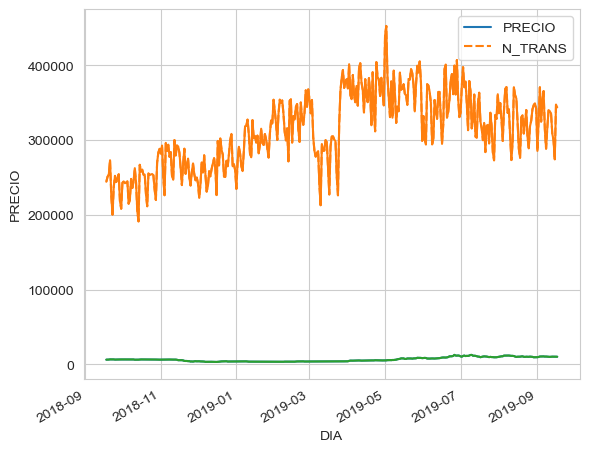

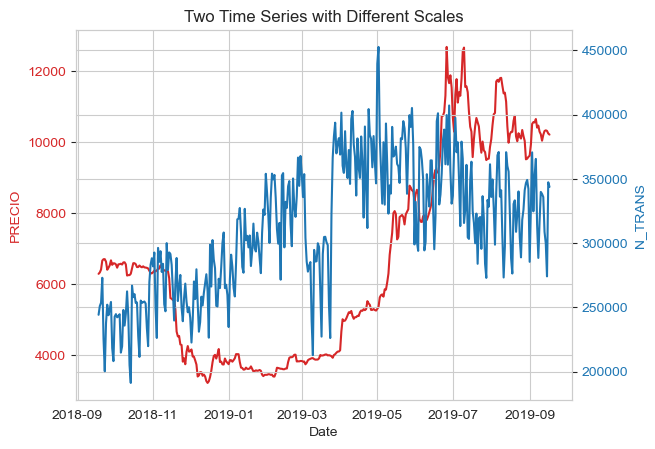

Dep. Variable:,PRECIO,No. Observations:,48
Model:,SimpleExpSmoothing,SSE,3535075.280
Optimized:,True,AIC,541.938
Trend:,None,BIC,545.681
Seasonal:,None,AICC,542.868
Seasonal Periods:,None,Date:,"Fri, 19 Jan 2024"
Box-Cox:,False,Time:,20:18:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,10237.184,l.0,True


In [8]:
Bitcoin_A = pd.read_excel('bitcoin_A.xlsx')

Bitcoin_A['DIA'] = pd.to_datetime(Bitcoin_A['DIA'], format='%Y-%m-%d')
print(Bitcoin_A.head())

print(f'\nRango de fechas: {Bitcoin_A.DIA.min()}/{Bitcoin_A.DIA.max()}')

Bitcoin_A.index = Bitcoin_A['DIA']
del Bitcoin_A['DIA']
print(Bitcoin_A.head())
sns.lineplot(Bitcoin_A)
plt.xticks(rotation=30, ha='right')

plt.plot(Bitcoin_A["N_TRANS"])
plt.xticks(rotation=30, ha='right')

sns.lineplot(Bitcoin_A["PRECIO"])
plt.xticks(rotation=30, ha='right')

fig, ax1 = plt.subplots()

# 2. Primera serie en el eje izquierdo (ax1)
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('PRECIO', color=color)
ax1.plot(Bitcoin_A['PRECIO'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 3. Segunda serie en el eje derecho (ax2)
ax2 = ax1.twinx()  # Compartir el eje x
color = 'tab:blue'
ax2.set_ylabel('N_TRANS', color=color)
ax2.plot(Bitcoin_A['N_TRANS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 4. Ajustes de diseño
plt.title('Two Time Series with Different Scales')
plt.show()

precio_R = Bitcoin_A.PRECIO.loc['2019-08-01':]
precio_R.index.freq = 'D'
# Aplicar suavizado exponencial simple.
modelo_ses = sm.tsa.SimpleExpSmoothing(precio_R, initialization_method="estimated").fit()
# Para seleccionar distintas alphas, fit(smoothing_level=alpha)
# Calcular la predicción para 7 días.
precio_s1 = modelo_ses.forecast(steps=7)
# Para ver parámetros, e.g.: alpha = 0.995
modelo_ses.summary()


In [9]:
modelo_ses.summary()


Dep. Variable:,PRECIO,No. Observations:,48
Model:,SimpleExpSmoothing,SSE,3535075.280
Optimized:,True,AIC,541.938
Trend:,None,BIC,545.681
Seasonal:,None,AICC,542.868
Seasonal Periods:,None,Date:,"Fri, 19 Jan 2024"
Box-Cox:,False,Time:,20:19:05
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,10237.184,l.0,True


In [10]:
from IPython.core.display import HTML

# Asume que 'modelo_ses' es tu modelo ajustado
resumen = modelo_ses.summary()
HTML(resumen.as_html())

Dep. Variable:,PRECIO,No. Observations:,48
Model:,SimpleExpSmoothing,SSE,3535075.280
Optimized:,True,AIC,541.938
Trend:,None,BIC,545.681
Seasonal:,None,AICC,542.868
Seasonal Periods:,None,Date:,"Fri, 19 Jan 2024"
Box-Cox:,False,Time:,20:19:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,10237.184,l.0,True
